<a href="https://colab.research.google.com/github/VienneseWaltz/DeepLearningExploration/blob/main/RootCauseAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Load the root_cause_analysis data file and review its content
rca_data = pd.read_csv("/content/root_cause_analysis.csv")

print("\nLoaded Data: \n------------------------------------")
print(rca_data.head())





Loaded Data: 
------------------------------------
   ID  CPU_LOAD  MEMORY_LEAK_LOAD  DELAY  ERROR_1000  ERROR_1001  ERROR_1002  \
0   1         0                 0      0           0           1           0   
1   2         0                 0      0           0           0           0   
2   3         0                 1      1           0           0           1   
3   4         0                 1      0           1           1           0   
4   5         1                 1      0           1           0           1   

   ERROR_1003     ROOT_CAUSE  
0           1    MEMORY_LEAK  
1           1    MEMORY_LEAK  
2           1    MEMORY_LEAK  
3           1    MEMORY_LEAK  
4           0  NETWORK_DELAY  


**Convert data**
Input data needs to be converted to formats that can be consumed by ML algorithms

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf

label_encoder = preprocessing.LabelEncoder()
rca_data['ROOT_CAUSE'] = label_encoder.fit_transform(rca_data['ROOT_CAUSE'])

# Convert Pandas DataFrame to a numpy vector
np_rca = rca_data.to_numpy().astype(float)
# print("np_rca = ", np_rca)

# Extract the feature variables (X)
X_data = np_rca[:, 1:8]
# print("X_data = : ", X_data)

# Extract the target variable (Y), convert to one-hot-endcoding
Y_data = np_rca[:, 8]                              # column 8 data
Y_data = tf.keras.utils.to_categorical(Y_data, 3)  # 3 classes there

print("\nFeatures: \n---------------------")
print(X_data[:5, :])

print("\nTarget after one-hot encoding: \n---------------------------")
print(Y_data[:5, :])

# Split training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.10)


print("\nTrain Testing Dimensions: \n-----------------")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
print("Shape of feature variables: ", X_train.shape)
print("Shape of target variable: ", Y_train.shape)


Features: 
---------------------
[[0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0. 1. 1.]
 [0. 1. 0. 1. 1. 0. 1.]
 [1. 1. 0. 1. 0. 1. 0.]]

Target after one-hot encoding: 
---------------------------
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Train Testing Dimensions: 
-----------------
(900, 7) (900, 3) (100, 7) (100, 3)
Shape of feature variables:  (900, 7)
Shape of target variable:  (900, 3)


**Building and evaluating the model**

In [ ]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2

# Setup Training Parameters
EPOCHS = 20
BATCH_SIZE = 64
VERBOSE = 1
OUTPUT_CLASSES = len(label_encoder.classes_)
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2

# Create a Keras Sequential Model
model = tf.keras.models.Sequential()

# Add a Dense Layer
model.add(keras.layers.Dense(N_HIDDEN,
                             input_shape=(7, ),
                             name = 'Dense-Layer-1',
                             activation = 'relu'))

# Add a second dense layer
model.add(keras.layers.Dense(N_HIDDEN,
                             name = 'Hidden-Layer-2',
                             activation='relu'))

# Add an output layer with softmax activation for categorial prediction
model.add(keras.layers.Dense(OUTPUT_CLASSES,
                             name = 'Final',
                             activation = 'softmax'))

# Compile the model with loss & metrics
model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# Print the model meta-data
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-1 (Dense)       (None, 128)               1024      
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Final (Dense)               (None, 3)                 387       
                                                                 
Total params: 17923 (70.01 KB)
Trainable params: 17923 (70.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Training and evaluatind the Model**

In [ ]:
print("\nTraining Progress: \n----------------------------------------------------------")

# Fit the model. This will perform the entire training cycle, including forward propagation,
# lostt computation, backward propagation, and gradient descent.
# Execute
history = model.fit(X_train,
                    Y_train,
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS,
                    verbose = VERBOSE,
                    validation_split = VALIDATION_SPLIT)



Training Progress: 
----------------------------------------------------------
Epoch 1/20
12/12 [==============================] - 1s 22ms/step - loss: 0.9131 - accuracy: 0.6667 - val_loss: 0.7164 - val_accuracy: 0.7778
Epoch 2/20
12/12 [==============================] - 0s 7ms/step - loss: 0.6500 - accuracy: 0.7903 - val_loss: 0.5408 - val_accuracy: 0.8556
Epoch 3/20
12/12 [==============================] - 0s 5ms/step - loss: 0.5436 - accuracy: 0.8056 - val_loss: 0.4670 - val_accuracy: 0.8278
Epoch 4/20
12/12 [==============================] - 0s 8ms/step - loss: 0.5026 - accuracy: 0.8083 - val_loss: 0.4345 - val_accuracy: 0.8222
Epoch 5/20
12/12 [==============================] - 0s 10ms/step - loss: 0.4897 - accuracy: 0.8111 - val_loss: 0.4128 - val_accuracy: 0.8556
Epoch 6/20
12/12 [==============================] - 0s 8ms/step - loss: 0.4764 - accuracy: 0.8139 - val_loss: 0.4354 - val_accuracy: 0.8056
Epoch 7/20
12/12 [==============================] - 0s 9ms/step - loss: 0.4721

**Plot Accuracy of The Model After Each Epoch**

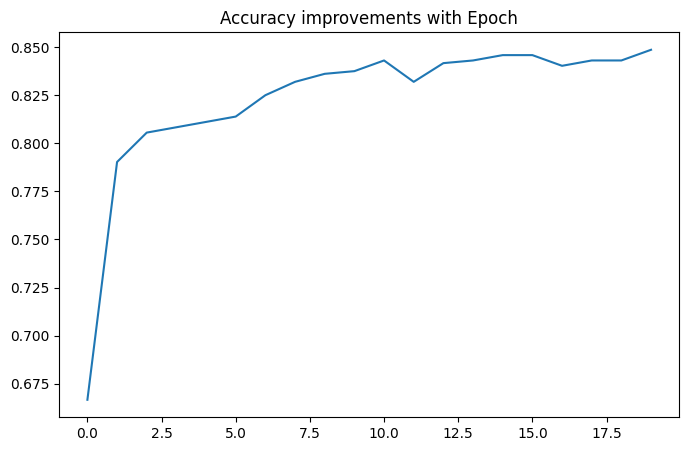

In [ ]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history)["accuracy"].plot(figsize = (8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

In [ ]:
# Evalue the model against the test dataset and print results
print("\nEvaluation against Test Dataset: \n-----------------------------------")
model.evaluate(X_test, Y_test)


Evaluation against Test Dataset: 
-----------------------------------
4/4 [==============================] - 0s 4ms/step - loss: 0.3406 - accuracy: 0.8500


[0.34063786268234253, 0.8500000238418579]

**Predicting Root Causes**

In [ ]:
# Pass individual flags to predict the root cause
CPU_LOAD = 1
MEMORY_LOAD = 0
DELAY = 0
ERROR_1000 = 0
ERROR_1001 = 1
ERROR_1002 = 1
ERROR_1003 = 0

prediction = np.argmax(model.predict(
             [[CPU_LOAD, MEMORY_LOAD, DELAY,
               ERROR_1000, ERROR_1001, ERROR_1002, ERROR_1003]]), axis = 1)
print(label_encoder.inverse_transform(prediction))

1/1 [==============================] - 0s 205ms/step
[0]


In [ ]:
# Predicting as a Batch
print(label_encoder.inverse_transform(np.argmax(
    model.predict([[1, 0, 0, 0, 1, 1, 0],
                     [0,1,1,1,0,0,0],
                     [1, 1, 0, 1, 1, 0, 1],
                     [0, 0, 0, 0, 0, 1, 0],
                     [1, 0, 1, 0, 1, 1, 1]]), axis = 1)))


1/1 [==============================] - 0s 41ms/step
[0 2 1 0 0]
